In [9]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import os
os.chdir("/home/zongchen/thinned_mfld")

import sys
sys.path.append("/home/zongchen/thinned_mfld")
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_platform_name", "cpu")

from tqdm import tqdm

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 18
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')

# plt.rc('font', family='Arial', size=12)
plt.rc('axes', titlesize=22, labelsize=22, grid=True)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=22, frameon=False)
plt.rc('xtick', labelsize=18, direction='in')
plt.rc('ytick', labelsize=18, direction='in')
plt.rc('figure', figsize=(6, 4), dpi=100)

In [10]:
seed_list = [0, 1, 2]
methods_list = ['kt', 'random', 'false']

trajectory_dict = {'kt': [], 'random': [], 'false': []}
mmd_dict = {'kt': [], 'random': [], 'false': []}

for method in methods_list:
    for seed in seed_list:
        dir = f"./results/neural_network/uci/sobolev_kernel/__thinning_{method}__step_size_0.1__bandwidth_1.0"
        dir += f"__step_num_10000__particle_num_1024__noise_scale_0.1__seed_{seed}__complete"
        trajectory = jnp.load(f"{dir}/trajectory.npy")
        mmd_trajectory = jnp.load(f"{dir}/mmd_path.npy")

        if seed == 0:
            trajectory_dict[method] = trajectory[:, None]
            mmd_dict[method] = mmd_trajectory[:, None]
        else:
            trajectory_dict[method] = jnp.concatenate([trajectory_dict[method], trajectory[:, None]], axis=1)
            mmd_dict[method] = jnp.concatenate([mmd_dict[method], mmd_trajectory[:, None]], axis=1)
            

In [16]:
trajectory.shape

(100, 1024, 15)

In [12]:
trajectory_dict_mean = {'kt': [], 'random': [], 'false': []}
trajectory_dict_ste = {'kt': [], 'random': [], 'false': []}
mmd_dict_mean = {'kt': [], 'random': [], 'false': []}
mmd_dict_ste = {'kt': [], 'random': [], 'false': []}

for method in methods_list:
    trajectory_dict_mean[method] = np.nanmean(trajectory_dict[method], axis=1)
    trajectory_dict_ste[method] = np.nanstd(trajectory_dict[method], axis=1) / np.sqrt(trajectory_dict[method].shape[1])
    mmd_dict_mean[method] = np.nanmean(mmd_dict[method], axis=1)
    mmd_dict_ste[method] = np.nanstd(mmd_dict[method], axis=1) / np.sqrt(mmd_dict[method].shape[1])



In [14]:
trajectory_dict_mean[method].shape

(100, 1024, 15)

ValueError: x and y can be no greater than 2D, but have shapes (100,) and (100, 1024, 15)

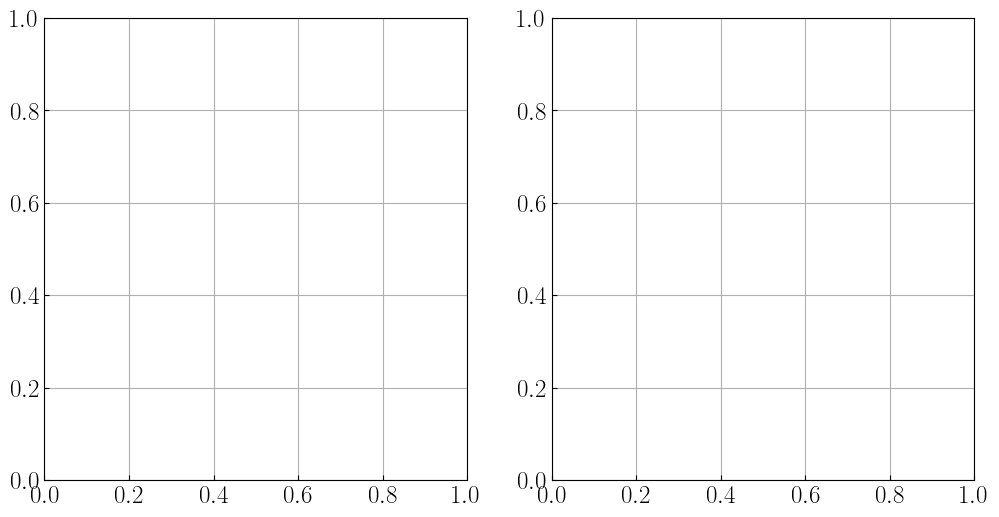

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].grid(True)

for method in methods_list:
    axs[0].plot(jnp.arange(trajectory_dict_mean[method].shape[0]), trajectory_dict_mean[method], label=method, marker='o')
    axs[0].fill_between(jnp.arange(trajectory_dict_mean[method].shape[0]), trajectory_dict_mean[method] - trajectory_dict_ste[method], 
                        trajectory_dict_mean[method] + trajectory_dict_ste[method], alpha=0.2)
    axs[0].legend()

for method in methods_list:
    axs[1].plot(jnp.arange(mmd_dict_mean[method].shape[0]), mmd_dict_mean[method], label=method, marker='o')
    axs[1].fill_between(jnp.arange(mmd_dict_mean[method].shape[0]), mmd_dict_mean[method] - mmd_dict_ste[method], 
                        mmd_dict_mean[method] + mmd_dict_ste[method], alpha=0.2)
    axs[1].legend()

plt.show()
